In [784]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam

In [674]:
# Import data
df_previous = pd.read_csv('Resources/PlayerSeasonTotals_2122_2324.csv')
df_current = pd.read_csv('Resources/PlayerSeasonTotals_2425.csv')

### Prepare Previous Year Data (2021/2022, 2022/2023, 2023/2024 Seasons)

In [677]:
# Create Points Per Game Metric
df_previous['PPG'] = df_previous['Total Points'] / df_previous['GP']

In [679]:
# Preview data for data from 2021/2022 through 2023/2024 season
df_previous[['Player', 'GP', 'Total Points', 'PPG']]

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703
5,Mikko Rantanen,237,301,1.270042
6,Matthew Tkachuk,241,301,1.248963
7,David Pastrnak,236,300,1.271186
8,Auston Matthews,228,298,1.307018
9,J.T. Miller,242,284,1.173554


In [681]:
# Count the number of rows where Total Points equals 0
rows_with_zero_points = df_previous[df_previous['Total Points'] == 0].shape[0]

print(f"Number of rows with Total Points = 0: {rows_with_zero_points}")

Number of rows with Total Points = 0: 144


In [683]:
#Remove rows where Total Points = 0
df_previous = df_previous[df_previous["Total Points"] != 0]
df_previous[['Player', 'GP', 'Total Points', 'PPG']].head()

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703


In [685]:
# Count the number of rows where GP < 60 
rows_less_than_60_points = df_previous[df_previous['GP'] < 60].shape[0]

print(f"Number of rows with Total Points < 60 : {rows_less_than_60_points}")

Number of rows with Total Points < 60 : 342


In [687]:
#Remove rows where GP < 60 
df_previous = df_previous[df_previous["GP"] >= 60 ]
df_previous[['Player', 'GP', 'Total Points', 'PPG']].head()

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703


### Prepare Current Year Data (2024/2025 partially completed Season)

In [690]:
# Create Points Per Game Metric
df_current['PPG'] = df_current['Total Points'] / df_current['GP']

In [692]:
# Preview data for data for the 2024/2025 season (current season)
df_current[['Player', 'GP', 'Total Points', 'PPG']].head()

,Player,GP,Total Points,PPG
0,Nathan MacKinnon,41,66,1.609756
1,Leon Draisaitl,39,59,1.512821
2,Mikko Rantanen,41,58,1.414634
3,Mitch Marner,41,56,1.365854
4,Nikita Kucherov,35,55,1.571429


In [694]:
# Count the number of rows where Total Points equals 0
rows_with_zero_points = df_current[df_current['Total Points'] == 0].shape[0]

print(f"Number of rows with Total Points = 0: {rows_with_zero_points}")

Number of rows with Total Points = 0: 104


In [696]:
#Remove rows where Total Points = 0
df_current = df_current[df_current["Total Points"] != 0]
df_current[['Player', 'GP', 'Total Points', 'PPG']].head()

,Player,GP,Total Points,PPG
0,Nathan MacKinnon,41,66,1.609756
1,Leon Draisaitl,39,59,1.512821
2,Mikko Rantanen,41,58,1.414634
3,Mitch Marner,41,56,1.365854
4,Nikita Kucherov,35,55,1.571429


In [698]:
# Count the number of rows where GP < 20 
rows_less_than_20_points = df_current[df_current['GP'] < 20].shape[0]

print(f"Number of rows with GP < 20 : {rows_less_than_20_points}")

Number of rows with GP < 20 : 103


In [700]:
#Remove rows where GP < 20 
df_previous = df_previous[df_previous["GP"] >= 20 ]
df_previous[['Player', 'GP', 'Total Points', 'PPG']].head()

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703


In [734]:
# Prepare features and target variable
# First attempt at features
features = ['TOI', 'Shots', 'ixG', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts', 'Rebounds Created', 'PIM', 
            'Total Penalties', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits', 'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost']
# Second attempt at features after removing low impact features
features_2 = ['TOI', 'Shots', 'ixG', 'iCF', 'iFF', 'iSCF', 'Giveaways', 'Takeaways', 'Hits']

target = 'PPG'

X = df_previous[features_2]
y = df_previous[target]

In [736]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [738]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit Random Forest (RF) Model

In [741]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [743]:
# Make predictions on test set
y_pred = rf_model.predict(X_test_scaled)

## Evaluate RF Model

In [746]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.08202934827883712
Mean Squared Error: 0.01270361622987179
R-squared Score: 0.8286389585497922


## Apply RF Model to Current Season

In [749]:
# Prepare current season data
X_current = df_current[features_2]
X_current_scaled = scaler.transform(X_current)

In [751]:
# Predict points for current season
current_predictions_rf = rf_model.predict(X_current_scaled)*3

In [753]:
# Adjust predictions for 82-game schedule
games_played = df_current['GP']
current_points = df_current['Total Points']
remaining_games = 82 - games_played
current_ppg = current_points / games_played
projected_points = current_points + (current_ppg * remaining_games)

In [755]:
# Add predictions to current season dataframe
df_current['RF_Predicted_PPG'] = current_predictions_rf
df_current['RF_Predicted_Points'] = (current_predictions_rf *82).round().astype(int)

In [757]:
# Display results sorted by projected season points

# Create results dataframe
results = pd.DataFrame({
    'Player': df_current['Player'],
    'Games Played': games_played,
    'Current Points': current_points,
    'Current Pace': projected_points.round(0),
    'Model PPG': current_predictions_rf,
    'Model Prediction': (current_predictions_rf *82).round().astype(int)
})

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap to multiple lines
pd.set_option('display.max_rows', None)     # Show all rows

# Sort by model predictions
results = results.sort_values('Model Prediction', ascending=False)
print("\nFull Season Point Predictions:")
print(results.to_string(index=True, justify='left'))


Full Season Point Predictions:
    Player                  Games Played  Current Points  Current Pace  Model PPG  Model Prediction
11             Jack Hughes  43            48               92.0         1.669882   137             
24          David Pastrnak  42            42               82.0         1.589471   130             
0         Nathan MacKinnon  41            66              132.0         1.561481   128             
19        William Nylander  41            43               86.0         1.482687   122             
17           Zach Werenski  40            45               92.0         1.398422   115             
2           Mikko Rantanen  41            58              116.0         1.399409   115             
69        Connor McMichael  40            31               64.0         1.384858   114             
51              Matt Boldy  40            34               70.0         1.391197   114             
115        Dougie Hamilton  43            26               50.0     

## RF Model Feature Importance

In [760]:
# Use sklearn to calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3339692352683684, 'iFF'),
 (0.30470076233270765, 'Shots'),
 (0.08123060994522333, 'iSCF'),
 (0.07446604660483341, 'ixG'),
 (0.07176688708383283, 'Hits'),
 (0.0447475481282128, 'Giveaways'),
 (0.03557417427685345, 'iCF'),
 (0.02736384877208167, 'Takeaways'),
 (0.026180887587886496, 'TOI')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

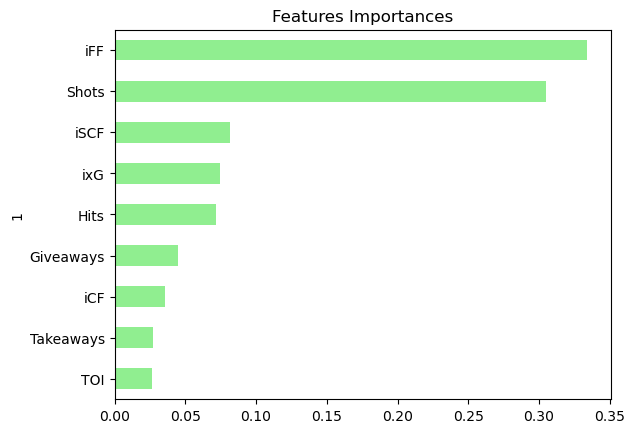

In [762]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## NHL Stats Glossary
**iFF** - Any unblocked shot attempt (goals, shots on net and misses) by the player, outside of the shootout.<br>
**Shots** - Any shot attempt on net (goals and shots on net) by the player, outside of the shootout.<br>
**iSCF** - Any scoring chance by the player, outside of the shootout.<br>
**ixG** - It estimates how many goals a player should have scored based on factors such as shot location, angle, and type<br>
**Hits** - Number of hits made by the player.<br>
**Giveaways** - Number of unforced turnovers made by the player.<br>
**iCF** - Any shot attempt (goals, shots on net, misses and blocks) by the player, outside of the shootout.<br>
**Takeaways** - Number of times the player takes the puck away from the opposition.<br>
**TOI** - Total amount of time played.<br>
**Penalties Drawn** - Number of penalties committed against the player.<br>
**Hits Taken** - Number of hits taken by the player.<br>
**Rush Attempts** - Any rush shot attempt (goals, shots on net, misses and blocks) by the player, outside of the shootout.<br>
**Rebounds Created** - Any shot attempt (shots on net, misses and blocks) that results in a rebound shot attempt.<br>
**Shots Blocked** - Number of opposition shot attempts blocked by the player.<br>
**iHDCF** - Any high danger scoring chance by the player, outside of the shootout.<br>
**PIM** - Penalty minutes assessed to the player.<br>
**Faceoffs Won** - Faceoffs won by the player<br>
**Faceoffs Lost** - Faceoffs lost by the player<br>
**Total Penalties** - Total number of penalties taken by the player

## Fit Linear Regression (LR) Model

In [809]:
# Prepare features and target variable
# First set of featured tried
lr_features = ['TOI', 'Shots', 'ixG', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts', 'Rebounds Created', 'PIM', 
            'Total Penalties', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits', 'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost']
# Second attempt at features after removing low impact features
lr_features_2 = ['Shots', 'ixG', 'iCF', 'iFF', 'iSCF', 'iHDCF','Giveaways', 'Hits']

lr_target = 'PPG'

X = df_previous[lr_features_2]
y = df_previous[lr_target]

In [811]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [813]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [815]:
# Create a model with scikit-learn
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [817]:
# Make predictions using the X set
y_pred_lr = lr_model.predict(X_test_scaled)

## Evaluate LR Model

In [820]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.0764511735439704
Mean Squared Error: 0.010726909698118044
R-squared Score: 0.8553030582670242


## Apply LR Model to Current Season

In [831]:
# Prepare current season data
X_current = df_current[lr_features_2]
X_current_scaled = scaler.transform(X_current)

In [833]:
# Predict points for current season
current_predictions_lr = lr_model.predict(X_current_scaled)*3

In [835]:
# Add predictions to current season dataframe
df_current['LR_Predicted_PPG'] = current_predictions_lr
df_current['LR_Predicted_Points'] = (current_predictions_lr *82).round().astype(int)

In [844]:
# Create results dataframe
results = pd.DataFrame({
    'Team': df_current['Team'],
    'Player': df_current['Player'],
    'Current Points': current_points,
    'Games Played': games_played,
    'Current Pace': projected_points.round(0),
    'RF Model Prediction': df_current['RF_Predicted_Points'],
    'LR Model Prediction': df_current['LR_Predicted_Points']
    
})

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap to multiple lines
pd.set_option('display.max_rows', None)     # Show all rows

# Sort by model predictions
results = results.sort_values('LR Model Prediction', ascending=False)
print("\nFull Season Point Predictions:")
print(results.to_string(index=True, justify='left'))


Full Season Point Predictions:
    Team      Player                  Current Points  Games Played  Current Pace  RF Model Prediction  LR Model Prediction
2         COL         Mikko Rantanen  58              41            116.0         115                  108                
0         COL       Nathan MacKinnon  66              41            132.0         128                  106                
11        N.J            Jack Hughes  48              43             92.0         137                  106                
8         MIN        Kirill Kaprizov  50              34            121.0         112                  104                
62        BOS          Brad Marchand  32              42             62.0         111                  101                
6         WPG            Kyle Connor  52              41            104.0         109                   99                
24        BOS         David Pastrnak  42              42             82.0         130                   96 

## LR Feature Importance

In [840]:
# Use sklearn to calculate feature importance
importances = lr_model.coef_
# We can sort the features by their importance
sorted(zip(lr_model.coef_, X.columns), reverse=True)

[(0.39252012807392317, 'ixG'),
 (0.1380451600332973, 'iSCF'),
 (0.10380319424073095, 'iCF'),
 (0.05592017496339356, 'Giveaways'),
 (0.027853297391178818, 'Shots'),
 (-0.05435408042494901, 'Hits'),
 (-0.23108110205917112, 'iFF'),
 (-0.24605317516019196, 'iHDCF')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

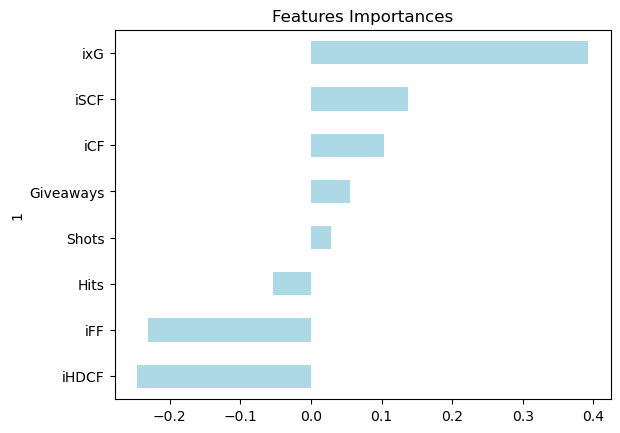

In [842]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(lr_model.coef_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Features Importances', legend=False)